<a href="https://colab.research.google.com/github/karthiklakkur1/Crop-weed-extension/blob/main/plantdocdataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulhasibuddin/plant-doc-dataset")

print("Path to dataset files:", path)

100%|██████████| 882M/882M [00:12<00:00, 74.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abdulhasibuddin/plant-doc-dataset/versions/1


In [ ]:
import kagglehub
from google.colab import drive
import shutil
import os

# Download latest version
dataset_path = kagglehub.dataset_download("abdulhasibuddin/plant-doc-dataset")

# Define destination directory in Google Drive
dest_path = "/content/drive/MyDrive/capstone/plant-doc-dataset"

# Ensure the destination folder exists
os.makedirs(dest_path, exist_ok=True)

# Copy dataset files to Google Drive (instead of moving)
shutil.copytree(dataset_path, dest_path, dirs_exist_ok=True)

print("Dataset copied successfully to:", dest_path)


Dataset copied successfully to: /content/drive/MyDrive/capstone/plant-doc-dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/capstone/plant-doc-dataset"
print("Files in dataset:", os.listdir(dataset_path))


Files in dataset: ['PlantDoc-Dataset']


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/capstone/plant-doc-dataset/PlantDoc-Dataset"
folders = ["train", "test"]

# Count images per plant type
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    plant_types = os.listdir(folder_path)

    print(f"📂 {folder} Set - Number of Images Per Plant Type:")
    for plant in plant_types:
        plant_path = os.path.join(folder_path, plant)
        num_images = len(os.listdir(plant_path))
        print(f"   - {plant}: {num_images} images")



📂 train Set - Number of Images Per Plant Type:
   - Corn leaf blight: 180 images
   - Tomato leaf: 54 images
   - Tomato leaf mosaic virus: 44 images
   - Squash Powdery mildew leaf: 123 images
   - Potato leaf late blight: 97 images
   - Soyabean leaf: 57 images
   - Peach leaf: 103 images
   - Tomato leaf late blight: 101 images
   - Apple leaf: 82 images
   - Tomato mold leaf: 85 images
   - Corn Gray leaf spot: 64 images
   - Tomato leaf yellow virus: 69 images
   - Strawberry leaf: 88 images
   - Cherry leaf: 47 images
   - Apple rust leaf: 79 images
   - Potato leaf early blight: 109 images
   - grape leaf black rot: 56 images
   - Apple Scab Leaf: 77 images
   - Tomato Septoria leaf spot: 137 images
   - Tomato leaf bacterial spot: 98 images
   - Blueberry leaf: 105 images
   - Bell_pepper leaf spot: 62 images
   - Corn rust leaf: 106 images
   - Bell_pepper leaf: 53 images
   - grape leaf: 57 images
   - Tomato Early blight leaf: 74 images
   - Raspberry leaf: 109 images
📂 test

📂 train Set - Number of Images Per Plant Type:
   - Corn leaf blight: 180 images
   - Tomato leaf: 54 images
   - Tomato leaf mosaic virus: 44 images
   - Squash Powdery mildew leaf: 123 images
   - Potato leaf late blight: 97 images
   - Soyabean leaf: 57 images
   - Peach leaf: 103 images
   - Tomato leaf late blight: 101 images
   - Apple leaf: 82 images
   - Tomato mold leaf: 85 images
   - Corn Gray leaf spot: 64 images
   - Tomato leaf yellow virus: 69 images
   - Strawberry leaf: 88 images
   - Cherry leaf: 47 images
   - Apple rust leaf: 79 images
   - Potato leaf early blight: 109 images
   - grape leaf black rot: 56 images
   - Apple Scab Leaf: 77 images
   - Tomato Septoria leaf spot: 137 images
   - Tomato leaf bacterial spot: 98 images
   - Blueberry leaf: 105 images
   - Bell_pepper leaf spot: 62 images
   - Corn rust leaf: 106 images
   - Bell_pepper leaf: 53 images
   - grape leaf: 57 images
   - Tomato Early blight leaf: 74 images
   - Raspberry leaf: 109 images
📂 test

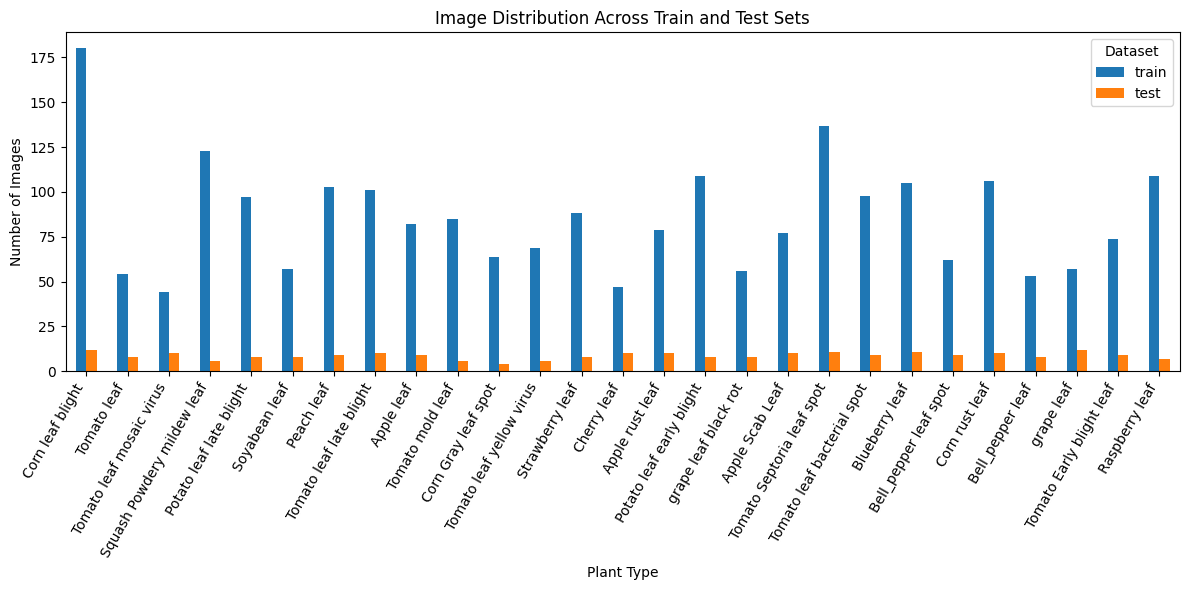

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = "/content/drive/MyDrive/plant-doc-dataset/PlantDoc-Dataset"
folders = ["train", "test"]

# Store image counts
data = {}

for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    plant_types = os.listdir(folder_path)

    print(f"📂 {folder} Set - Number of Images Per Plant Type:")
    for plant in plant_types:
        plant_path = os.path.join(folder_path, plant)
        num_images = len(os.listdir(plant_path))

        print(f"   - {plant}: {num_images} images")

        # Store counts for plotting
        if plant not in data:
            data[plant] = {"train": 0, "test": 0}
        data[plant][folder] = num_images

# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(data, orient="index")

# Plot the bar chart with adjusted x-axis labels
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(kind="bar", ax=ax)
ax.set_xlabel("Plant Type")
ax.set_ylabel("Number of Images")
ax.set_title("Image Distribution Across Train and Test Sets")

# Adjust x-axis labels to prevent overlap
plt.xticks(rotation=60, ha="right")  # Rotate labels and align them to the right
plt.legend(title="Dataset")
plt.tight_layout()  # Adjust layout to prevent cutoff

plt.show()


In [ ]:
import os
import cv2

dataset_path = "/content/drive/MyDrive/plant-doc-dataset/PlantDoc-Dataset"
folders = ["train", "test"]

# Store image dimensions
image_shapes = []

for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    plant_types = os.listdir(folder_path)

    print(f"\n📂 Analyzing images in {folder} set...")

    for plant in plant_types:
        plant_path = os.path.join(folder_path, plant)
        images = os.listdir(plant_path)

        for img_name in images[:10]:  # Check first 10 images per plant type
            img_path = os.path.join(plant_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:  # Ensure image is loaded
                image_shapes.append(img.shape[:2])  # Store (height, width)

# Print unique image sizes
unique_sizes = set(image_shapes)
print("\n📏 Unique Image Dimensions:", unique_sizes)

# Aspect Ratio Analysis
aspect_ratios = [round(h / w, 2) for h, w in image_shapes]
unique_ratios = set(aspect_ratios)
print("\n📐 Unique Aspect Ratios:", unique_ratios)



📂 Analyzing images in train set...

📂 Analyzing images in test set...

📏 Unique Image Dimensions: {(559, 750), (1200, 1600), (317, 188), (350, 374), (394, 700), (540, 516), (750, 1000), (359, 450), (279, 350), (253, 450), (682, 447), (189, 267), (772, 1024), (300, 400), (263, 500), (3008, 2000), (900, 1200), (540, 390), (5184, 3456), (450, 600), (275, 330), (700, 613), (2736, 2736), (2136, 2848), (2736, 3648), (1376, 1012), (600, 800), (3264, 1836), (264, 347), (302, 450), (137, 252), (540, 349), (878, 1000), (1390, 1050), (2304, 3456), (630, 1200), (1600, 1530), (1174, 1300), (450, 424), (1000, 720), (472, 628), (364, 500), (1536, 2048), (552, 736), (707, 1024), (280, 390), (822, 700), (786, 1024), (765, 574), (500, 667), (324, 432), (320, 480), (972, 1300), (997, 1500), (528, 774), (233, 350), (1260, 1056), (1000, 751), (1185, 1300), (720, 800), (1002, 1300), (2083, 2315), (320, 448), (263, 350), (912, 1500), (4000, 6000), (359, 430), (413, 550), (2067, 3075), (840, 1368), (1125, 15

In [2]:
import os
import cv2

# Define dataset path
dataset_path = "/content/drive/MyDrive/plant-doc-dataset/PlantDoc-Dataset"
folders = ["train", "test"]
target_size = (256, 256)  # Resize dimensions

# Loop through dataset folders
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    plant_types = os.listdir(folder_path)

    print(f"\n📂 Resizing images in {folder} set...")

    for plant in plant_types:
        plant_path = os.path.join(folder_path, plant)
        images = os.listdir(plant_path)

        for img_name in images:
            img_path = os.path.join(plant_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
                cv2.imwrite(img_path, resized_img)  # Overwrite the original image

    print(f"✅ Finished resizing images in {folder}")

print("\n🎉 All images resized to 256×256 pixels!")



📂 Resizing images in train set...
✅ Finished resizing images in train

📂 Resizing images in test set...
✅ Finished resizing images in test

🎉 All images resized to 256×256 pixels!
